Indian Startup Funding (In-depth analysis) by VARUN



**Importing All the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
!pip install squarify
import squarify
import re

%matplotlib inline


In [2]:
df = pd.read_csv("/content/start up funding.csv")
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


### Getting Familier With The Data








In [4]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [ ]:
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [ ]:
df.shape

(2372, 10)

In [ ]:
df.info()
df.isnull().sum() # checking for null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB


,0
SNo,0
Date,0
StartupName,0
IndustryVertical,171
SubVertical,936
CityLocation,179
InvestorsName,8
InvestmentType,1
AmountInUSD,847
Remarks,1953


In [ ]:
df['InvestmentType'].unique(),df['CityLocation'].unique()

(array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
        'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
       dtype=object),
 array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
        'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
        'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
        'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
        'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
        'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
        'Siliguri', nan, 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
        'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
        'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
        'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
        'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
        'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
        'Chennai/ Sing

In [ ]:
df.Remarks.first_valid_index ()
df.loc[1436:1440]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
1436,1436,01/12/2015,CollegeDekho,Online Education Information platform,NaN,Jaipur,GirnarSoft,Seed Funding,"1,000,000",NaN
1437,1437,01/12/2015,Black White Orange Brands,Brand Licensing Startup,NaN,Mumbai,YouWeCan Ventures,Seed Funding,NaN,NaN
1438,1438,01/12/2015,Biteclub,Gourmet Food Discovery & Delivery platform,NaN,Gurgaon,growX ventures,Private Equity,NaN,Pre-Series A
1439,1439,01/12/2015,Patel Logistics,Transportation & Logistics Platform,NaN,Mumbai,Frontline Strategy,Private Equity,"5,600,000",NaN
1440,1440,01/12/2015,Wigzo,Enterprise Marketing Automation platform,NaN,New Delhi,"Aarin Capital Partners, TV Mohandas Pai",Seed Funding,"500,000",Pre-Series A


#From the above observation we have seen that
1.   there are too many NULL values in "remarks" and "SubVertical"
2.   the string "Seed funding" is same as "SeedFunding" and needs to be corrected



# *CLEANING OF DATA*

In [3]:
df['InvestmentType'] = df['InvestmentType'].astype('category')


In [4]:
df.loc[2103]

,2103
SNo,2103
Date,12/05.2015
StartupName,Mobiefit
IndustryVertical,Mobile Fitness App
SubVertical,NaN
CityLocation,Goa
InvestorsName,Prototyze
InvestmentType,Seed Funding
AmountInUSD,NaN
Remarks,NaN


In [4]:
df['CityLocation']=df['CityLocation'].fillna(value = 'NotSpecific')
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')
df.isnull().sum()

,0
SNo,0
Date,0
StartupName,0
IndustryVertical,0
SubVertical,936
CityLocation,0
InvestorsName,8
InvestmentType,1
AmountInUSD,847
Remarks,1953


In [5]:
newDf= df.copy()
del newDf['Remarks']
del newDf['SubVertical']
del newDf['SNo']
newDf

,Date,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...
2367,29/01/2015,Printvenue,Other,NotSpecific,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,29/01/2015,Graphene,Other,NotSpecific,KARSEMVEN Fund,Private Equity,"825,000"
2369,30/01/2015,Mad Street Den,Other,NotSpecific,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,30/01/2015,Simplotel,Other,NotSpecific,MakeMyTrip,Private Equity,NaN


In [6]:
newDf['InvestmentType'] = newDf['InvestmentType'].astype('category')
newDf['InvestmentType']=newDf['InvestmentType'].apply(lambda x:x.replace(' ','').lower())
newDf['InvestmentType'].unique()

array(['privateequity', 'seedfunding', 'debtfunding', nan, 'crowdfunding'],
      dtype=object)

In [ ]:
newDf.dtypes

,0
Date,object
StartupName,object
IndustryVertical,object
CityLocation,object
InvestorsName,object
InvestmentType,object
AmountInUSD,object


In [7]:
# newDf['Date']=pd.to_datetime(newDf['Date'],format='%d/%m/%Y')
# newDf.loc[2103]

mask = newDf['Date'].str.contains(r'\d{2}/\d{2}\.\d{4}')
positions = df[mask].index
print("Positions with incorrect date format:", positions)

newDf.loc[mask, 'Date'] = newDf.loc[mask, 'Date'].str.replace('.','/')

newDf['Date'] = newDf['Date'].str.replace('//', '/')

newDf['Date']=pd.to_datetime(newDf['Date'],format='%d/%m/%Y')

newDf.info()


Positions with incorrect date format: Index([2103, 2104, 2159, 2339], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2372 non-null   datetime64[ns]
 1   StartupName       2372 non-null   object        
 2   IndustryVertical  2372 non-null   object        
 3   CityLocation      2372 non-null   object        
 4   InvestorsName     2364 non-null   object        
 5   InvestmentType    2371 non-null   object        
 6   AmountInUSD       1525 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 129.8+ KB


In [8]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newDf['numberofinvestors']=newDf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty'
newDf

,Date,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,TouchKin,Technology,Bangalore,Kae Capital,privateequity,"1,300,000",1
1,2017-08-02,Ethinos,Technology,Mumbai,Triton Investment Advisors,privateequity,NaN,1
2,2017-08-02,Leverage Edu,Consumer Internet,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,NaN,7
3,2017-08-02,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,"500,000",4
4,2017-08-02,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,"850,000",2
...,...,...,...,...,...,...,...,...
2367,2015-01-29,Printvenue,Other,NotSpecific,Asia Pacific Internet Group,privateequity,"4,500,000",1
2368,2015-01-29,Graphene,Other,NotSpecific,KARSEMVEN Fund,privateequity,"825,000",1
2369,2015-01-30,Mad Street Den,Other,NotSpecific,"Exfinity Fund, GrowX Ventures.",privateequity,"1,500,000",2
2370,2015-01-30,Simplotel,Other,NotSpecific,MakeMyTrip,privateequity,NaN,1


In [11]:
newDf.isnull().sum()
# newDf.dtypes
# newDf.tail()

,0
Date,0
StartupName,0
IndustryVertical,0
CityLocation,0
InvestorsName,8
InvestmentType,1
AmountInUSD,847
numberofinvestors,0


In [9]:
#city column is having multiple city names for some records

import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid dublicate entries
    if   re.search('/',x):
        return x.split('/')[0].strip()#converting multiple citycentres to single one
    else :
        return x.strip()# removing extra spaces from left and right to reduce duplicate cities
newDf['CityLocation']=newDf['CityLocation'].apply(convert_Slash)


In [10]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newDf['AmountInUSD']=newDf[newDf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')

In [14]:
newDf['AmountInUSD']=round(newDf['AmountInUSD'].fillna(np.mean(newDf['AmountInUSD'])))
newDf['AmountInUSD']=newDf['AmountInUSD'].astype('int')


In [11]:
newDf['InvestmentType'].fillna(method='bfill',inplace=True)

<ipython-input-11-70b606f17194>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newDf['InvestmentType'].fillna(method='bfill',inplace=True)


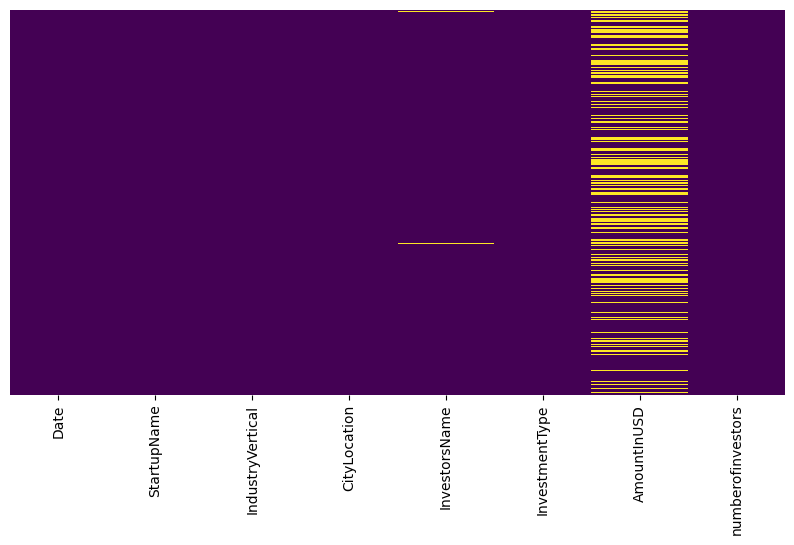

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(newDf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [13]:
newDf = newDf.dropna(subset=['InvestorsName'])


In [14]:
unique_startup_name=list(newDf['StartupName'].unique())
startupname=list(newDf['StartupName'])



for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]




In [15]:
newDf['StartupName']=startupname


<ipython-input-15-8f54d679d7df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['StartupName']=startupname


# ***In Depth ANALYSIS***

In [16]:
newDf['AmountInUSD'].describe().astype(int) # the funding is highly dispersed

,AmountInUSD
count,1520
mean,12067477
std,64133310
min,16000
25%,369500
50%,1100000
75%,6000000
max,1400000000


In [17]:
(newDf['StartupName'].unique().shape) # there are almost 2000 unique startups introduced btw 2015-2017

(1922,)

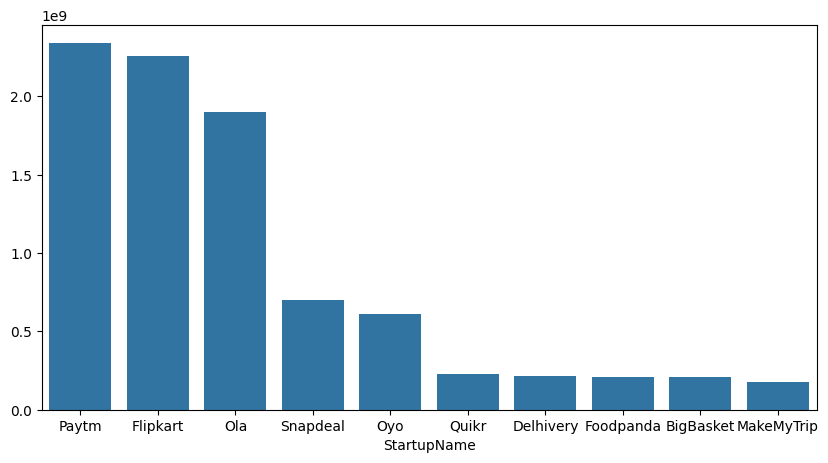

In [18]:
top10= newDf.groupby(['StartupName'])['AmountInUSD'].sum().sort_values(ascending=False).head(10)
top10 # top 10 most funded companies
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.show()

In [19]:
pd.crosstab(newDf['StartupName'], newDf['InvestmentType']).sort_values(by='privateequity', ascending=False)
#kind of investment did the top10 startups got

InvestmentType,crowdfunding,debtfunding,privateequity,seedfunding
StartupName,,,,
Ola,0,0,9,0
Swiggy,0,0,7,0
Paytm,0,0,6,0
UrbanClap,0,0,5,1
Flipkart,0,0,5,0
...,...,...,...,...
JollyFoodFellow,0,0,0,1
Jolly Food Fellow,0,0,0,1
Johari Shop,0,0,0,1


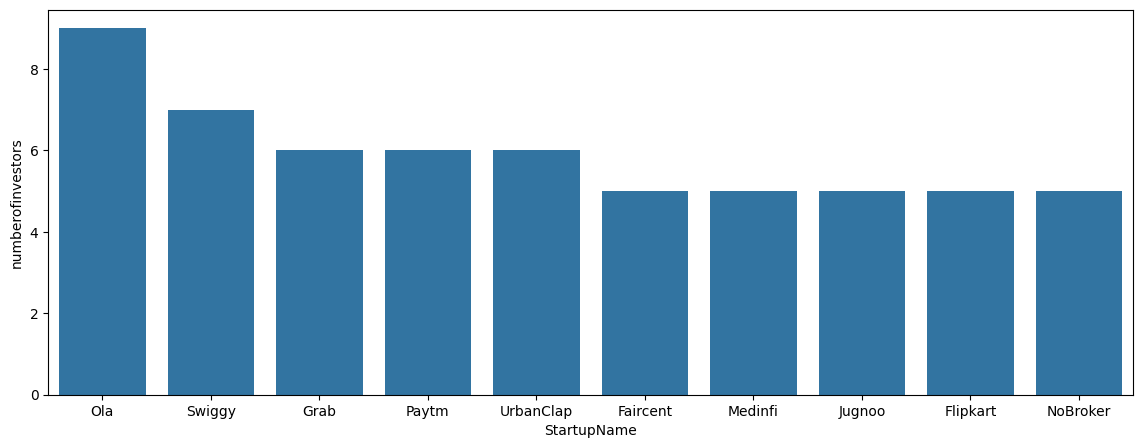

,numberofinvestors
StartupName,
Ola,9
Swiggy,7
Grab,6
Paytm,6
UrbanClap,6
Faircent,5
Medinfi,5
Jugnoo,5
Flipkart,5


In [20]:
cmi=show(newDf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
fig=plt.figure(figsize=(14,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head(10))
plt.show()
cmi.head(10)

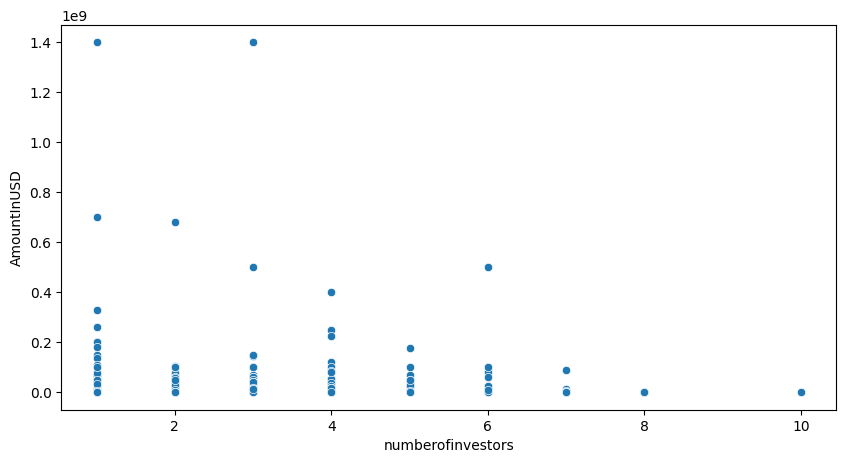

In [21]:
# does funding depends on numbe of investers

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.scatterplot(x='numberofinvestors',y='AmountInUSD',data=newDf)
plt.show()


In [ ]:
(newDf['InvestorsName']).value_counts().head(10)


,count
InvestorsName,
Undisclosed Investors,33
Undisclosed investors,27
Ratan Tata,24
Indian Angel Network,24
Kalaari Capital,16
Group of Angel Investors,15
Sequoia Capital,14
undisclosed investors,11
Brand Capital,10


In [ ]:
newDf.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)
#Total amount of funding recieved as per investment type


,AmountInUSD
InvestmentType,
privateequity,20880511447
seedfunding,7608324873
debtfunding,7800000
crowdfunding,155768


In [ ]:
#number of funding recieved as per investment type
newDf['InvestmentType'].value_counts()


,count
InvestmentType,
seedfunding,1295
privateequity,1066
crowdfunding,2
debtfunding,1


In [23]:
newDf['IndustryVertical']=newDf['IndustryVertical'].apply(lambda x: x.lower())
newDf.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False).head(10)
#top 10 industries with respect to funding

<ipython-input-23-ccd3706b5184>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['IndustryVertical']=newDf['IndustryVertical'].apply(lambda x: x.lower())


,AmountInUSD
IndustryVertical,
consumer internet,7514690557
ecommerce,5255706521
technology,2595446552
other,1713054288
online marketplace,700000000
e-commerce & m-commerce platform,680000000
car aggregator & retail mobile app,500000000
ecommerce marketplace,500000000
cab aggregator,400000000


In [ ]:
d = newDf['IndustryVertical'].value_counts().head(5)
d
#total number of fundings with respect to industry (top 5)

,count
IndustryVertical,
consumer internet,770
technology,313
ecommerce,230
other,171
healthcare,31


In [ ]:
f=newDf.groupby('InvestmentType')['AmountInUSD'].sum()
f
#total number of fundings with respect to investment type

,AmountInUSD
InvestmentType,
crowdfunding,155768
debtfunding,7800000
privateequity,20880511447
seedfunding,7608324873


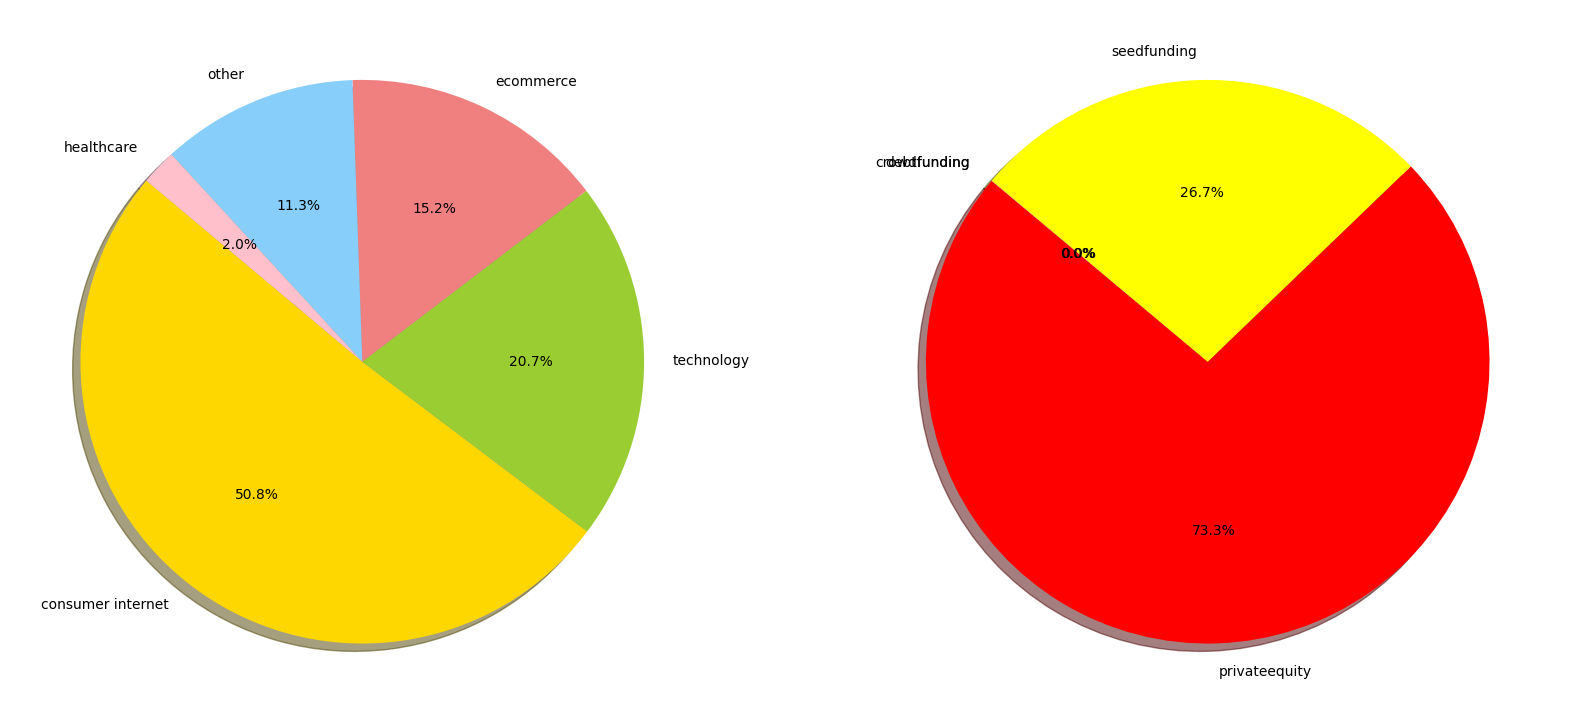

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart for IndustryVertical
ax[0].pie(d.values, labels=d.index, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink'],
          autopct='%1.1f%%', shadow=True, startangle=140, explode=[0, 0, 0, 0, 0])

# Pie chart for InvestmentType
ax[1].pie(f.values, labels=f.index, colors=['green', 'pink', 'red', 'yellow'],
          autopct='%1.1f%%', shadow=True, startangle=140, explode=[0, 0, 0, 0])

# Display the plots
plt.show()

#pictorial representation of the above

In [24]:
newDf = newDf.rename(columns={'IndustryVertical': 'Industry'})
newDf

,Date,StartupName,Industry,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,TouchKin,technology,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,Ethinos,technology,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,Leverage Edu,consumer internet,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,Zepo,consumer internet,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,Click2Clinic,consumer internet,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2
...,...,...,...,...,...,...,...,...
2367,2015-01-29,Printvenue,other,notspecific,Asia Pacific Internet Group,privateequity,4500000,1
2368,2015-01-29,Graphene,other,notspecific,KARSEMVEN Fund,privateequity,825000,1
2369,2015-01-30,Mad Street Den,other,notspecific,"Exfinity Fund, GrowX Ventures.",privateequity,1500000,2
2370,2015-01-30,Simplotel,other,notspecific,MakeMyTrip,privateequity,12031073,1


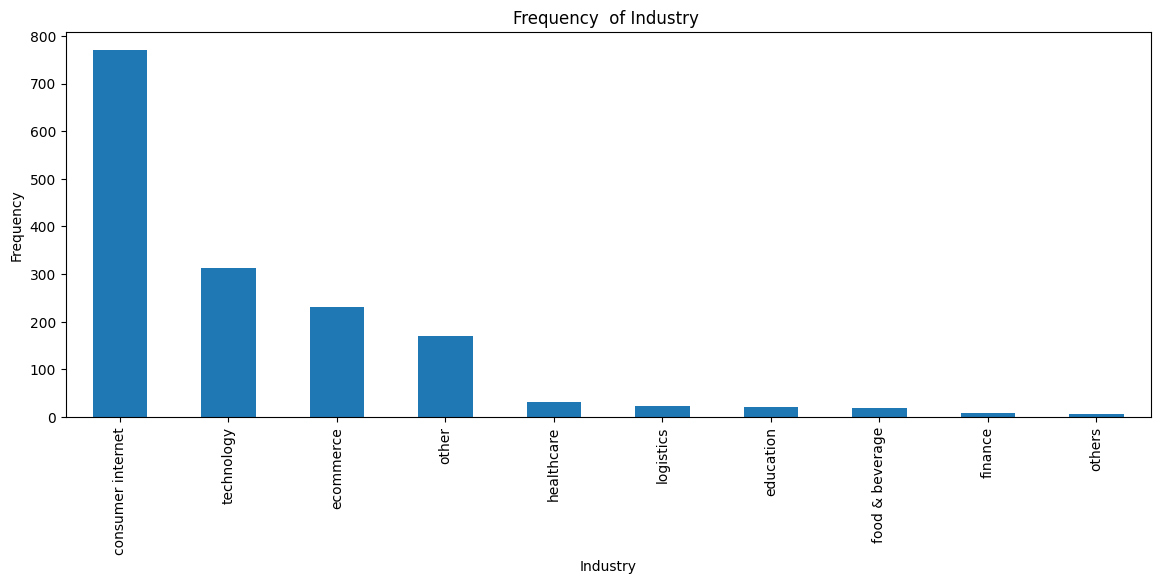

In [ ]:
plt.figure(figsize=(14,5))
iv=newDf['Industry'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency  of Industry ')
plt.ylabel('Frequency')
plt.xlabel('Industry')
plt.show()


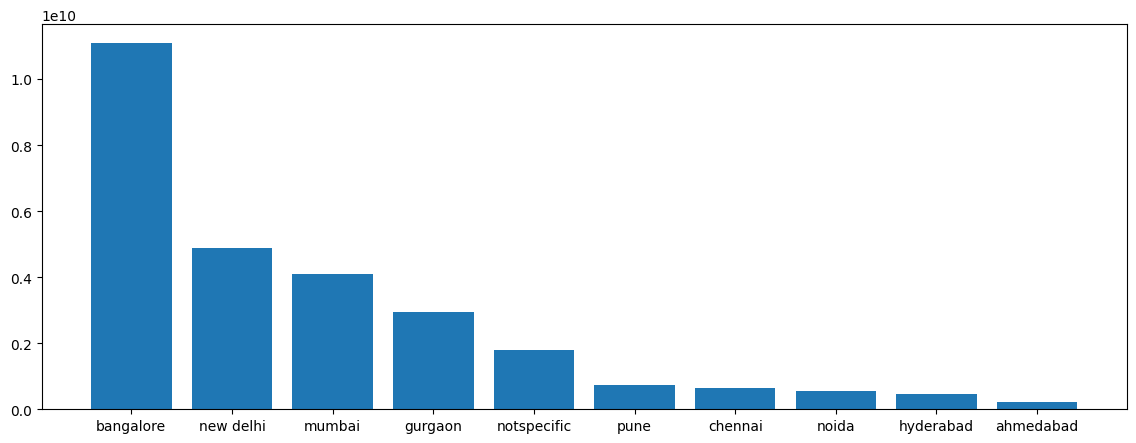

,AmountInUSD
CityLocation,
bangalore,11104903387
new delhi,4874560983
mumbai,4096620085
gurgaon,2959320902
notspecific,1801231080
pune,739616263
chennai,651726460
noida,567663409
hyderabad,460045606


In [ ]:
a=newDf.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,5))
plt.bar(a.index,a.values)
plt.show()
a
#amount of funding received by each city in decreasing order

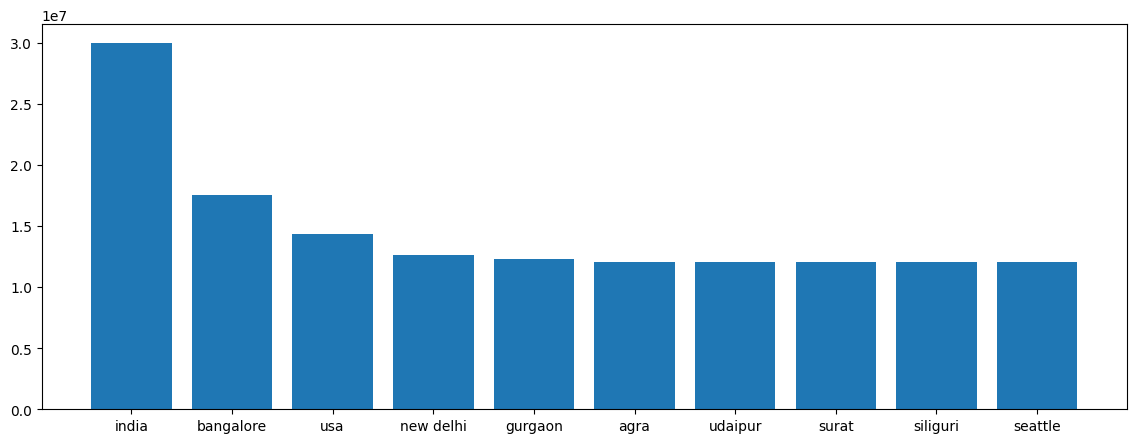

,AmountInUSD
CityLocation,
india,3.000000e+07
bangalore,1.751562e+07
usa,1.431554e+07
new delhi,1.266120e+07
gurgaon,1.233050e+07
agra,1.203107e+07
udaipur,1.203107e+07
surat,1.203107e+07
siliguri,1.203107e+07


In [ ]:
a=newDf.groupby('CityLocation')['AmountInUSD'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,5))
plt.bar(a.index,a.values)
plt.show()
a
#amount of funding received by each location in decreasing order
#banglore is prefered location for getting funded

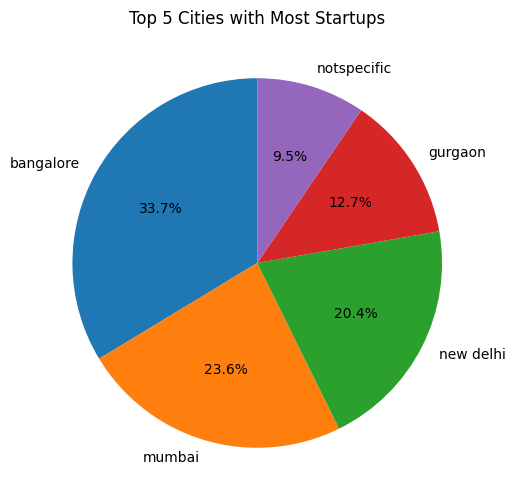

In [ ]:
s= newDf.groupby('CityLocation')['StartupName'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.pie(s.values, labels=s.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Cities with Most Startups')
plt.show()

#number of startups in each city
#banglore is most prefered for starting up

<ipython-input-21-441f11d13385>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='CityLocation',x='AmountInUSD',data=newDf[(newDf['InvestmentType']=='debtfunding')|(newDf['InvestmentType']=='crowdfunding')],estimator=np.sum,palette='coolwarm')


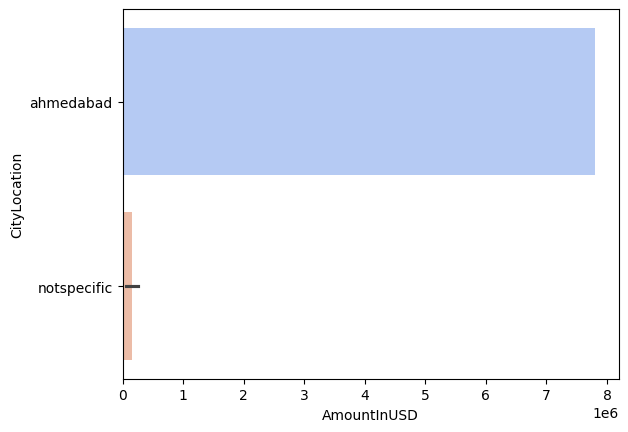

In [21]:
sns.barplot(y='CityLocation',x='AmountInUSD',data=newDf[(newDf['InvestmentType']=='debtfunding')|(newDf['InvestmentType']=='crowdfunding')],estimator=np.sum,palette='coolwarm')

#average investment in banglore is most
plt.show()
#amehdabad is the market place for debt funding

# Time Series Analysis

In [25]:
dnewdf=newDf.set_index('Date')
dnewdf.head()

,StartupName,Industry,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
Date,,,,,,,
2017-08-01,TouchKin,technology,bangalore,Kae Capital,privateequity,1300000,1
2017-08-02,Ethinos,technology,mumbai,Triton Investment Advisors,privateequity,12031073,1
2017-08-02,Leverage Edu,consumer internet,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
2017-08-02,Zepo,consumer internet,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
2017-08-02,Click2Clinic,consumer internet,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


In [26]:
dnewdf['Year'] = dnewdf.index.year
print('total number of unique startups funded in 2017 -'+str(len(dnewdf[dnewdf['Year'] == 2017]['StartupName'].unique())))
print('total number of unique startups funded in 2016 -'+str(len(dnewdf[dnewdf['Year']== 2016]['StartupName'].unique())))
print('total number of unique startups funded in 2015 -'+str(len(dnewdf[dnewdf['Year']== 2015]['StartupName'].unique())))


total number of unique startups funded in 2017 -417
total number of unique startups funded in 2016 -923
total number of unique startups funded in 2015 -824


In [27]:
x = dnewdf[dnewdf['Year']==2017]['AmountInUSD'].sum()
y=dnewdf[dnewdf['Year']==2016]['AmountInUSD'].sum()
z=dnewdf[dnewdf['Year']==2015]['AmountInUSD'].sum()
a = [z,y,x]
print("the total funding in 2017 is {}".format(dnewdf[dnewdf['Year']==2017]['AmountInUSD'].sum()
))
print("the total funding in 2016 is {}".format(dnewdf[dnewdf['Year']==2016]['AmountInUSD'].sum()
))
print("the total funding in 2015 is {}".format(dnewdf[dnewdf['Year']==2015]['AmountInUSD'].sum()
))

the total funding in 2017 is 7723122888
the total funding in 2016 is 8724735319
the total funding in 2015 is 12048933881


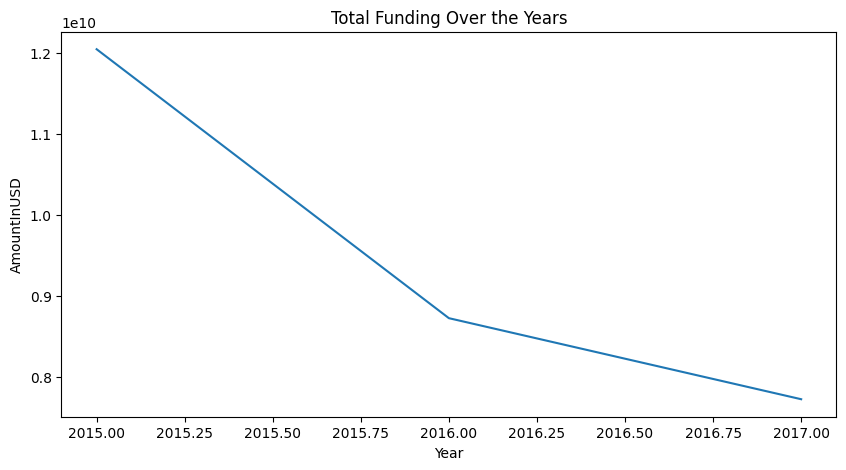

In [28]:
plt.figure(figsize=(10,5))
plt.plot([2015, 2016, 2017], a)
plt.xlabel('Year')
plt.ylabel('AmountInUSD')
plt.title('Total Funding Over the Years')
plt.show()
#funding has been decreased over the years

Text(0.5, 1.0, 'average funding amount')

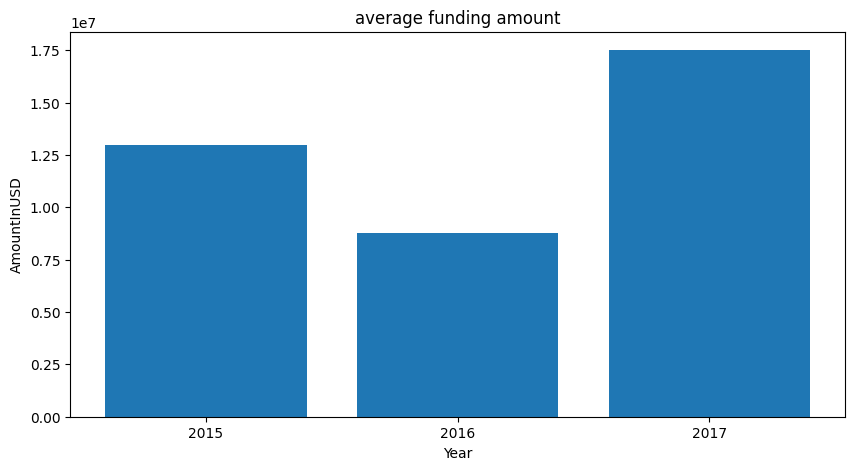

In [32]:
q=dnewdf['AmountInUSD'].resample('AS').mean()
#Resampling is the process of converting time series data from one frequency to another.
# 'AS' stands for "Annual Start", meaning the data is resampled to the start of each year.
plt.figure(figsize=(10,5))
plt.bar(["2015","2016","2017"],q)
plt.xlabel('Year')
plt.ylabel('AmountInUSD')
plt.title('average funding amount')


#2015: 100 funding rounds, total funding = $1 billion, average funding = $10 million.
# 2016: 200 funding rounds, total funding = $800 million, average funding = $4 million (more rounds but smaller investments).
# 2017: 150 funding rounds, total funding = $900 million, average funding = $6 million (fewer rounds but larger investments per round).

#Investors might have shifted their focus to more mature or promising startups, leading to larger investments in fewer companies, which would increase the average funding per round.


In [37]:
 dnewdf['Year'] = dnewdf.index.year
dnewdf['Month'] = dnewdf.index.month

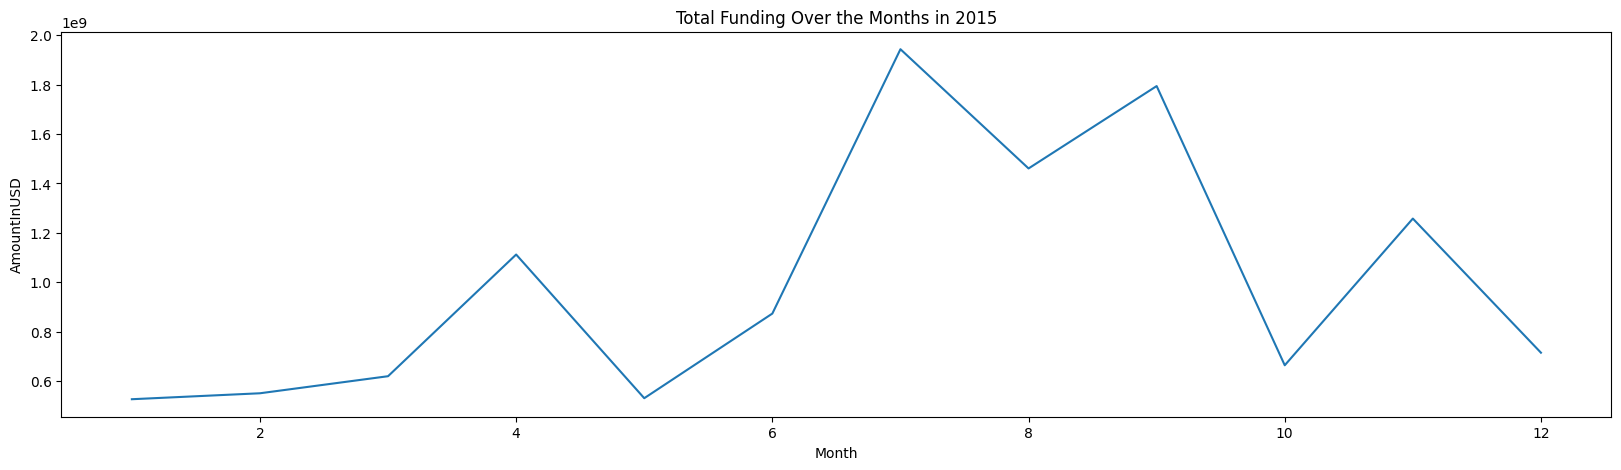

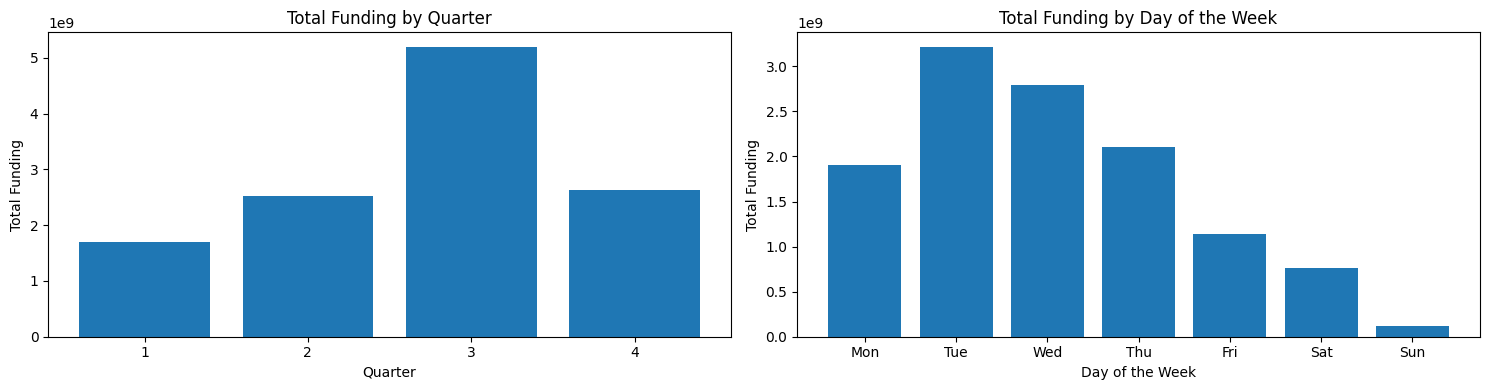

In [82]:
dnewdf_2015 = dnewdf[dnewdf['Year'] == 2015]
a = dnewdf_2015.groupby('Month')['AmountInUSD'].sum()
plt.figure(figsize=(20,5))
plt.plot(a.index,a.values)
plt.xlabel('Month')
plt.ylabel('AmountInUSD')
plt.title('Total Funding Over the Months in 2015')
plt.show()



# Calculate the total funding by quarter for 2015
quarterly_funding = dnewdf[dnewdf['Year'] == 2015].groupby('Quarter')['AmountInUSD'].sum()

# Calculate the total funding by day of the week for 2015
business_days = dnewdf[dnewdf['Year'] == 2015].groupby('DayOfWeek')['AmountInUSD'].sum()

# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Plotting total funding by quarter on the first subplot
ax1.bar(quarterly_funding.index, quarterly_funding.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Funding')
ax1.set_title('Total Funding by Quarter')
ax1.set_xticks(quarterly_funding.index)

# Plotting total funding by day of the week on the second subplot
ax2.bar(business_days.index, business_days.values)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Total Funding')
ax2.set_title('Total Funding by Day of the Week')
ax2.set_xticks(business_days.index)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

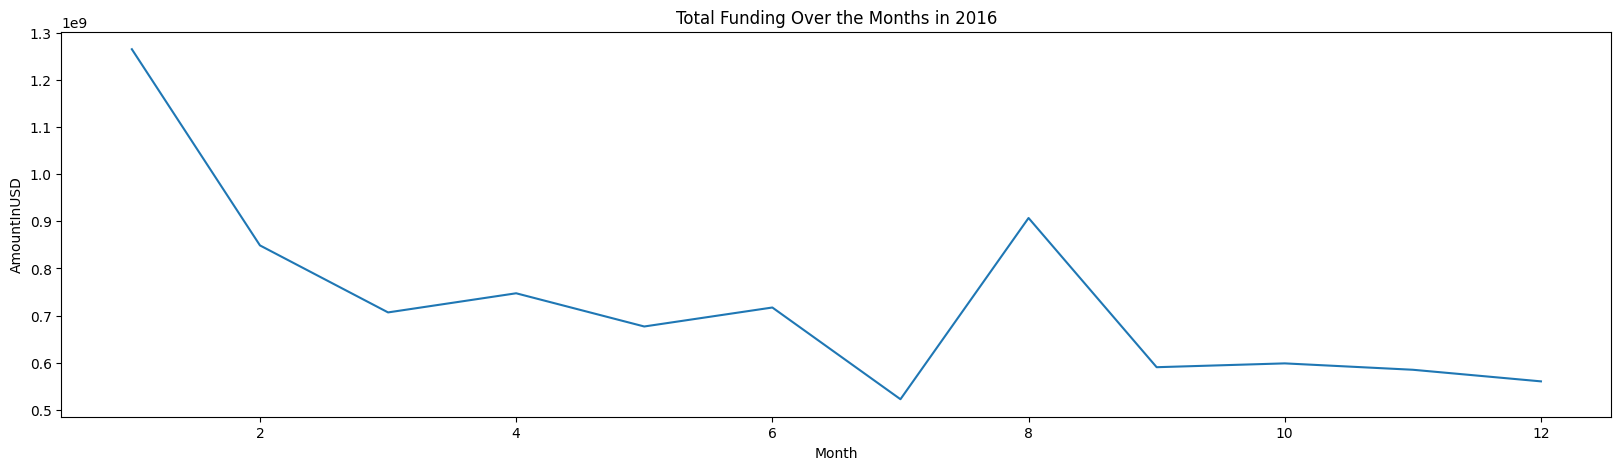

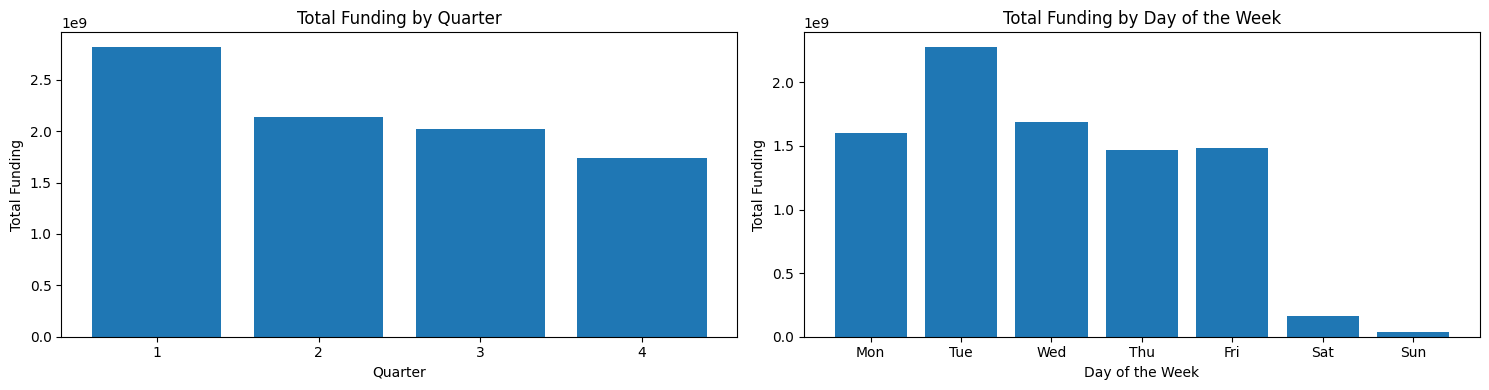

In [83]:
dnewdf_2016 = dnewdf[dnewdf['Year'] == 2016]
a = dnewdf_2016.groupby('Month')['AmountInUSD'].sum()
plt.figure(figsize=(20,5))
plt.plot(a.index,a.values)
plt.xlabel('Month')
plt.ylabel('AmountInUSD')
plt.title('Total Funding Over the Months in 2016')
plt.show()




quarterly_funding = dnewdf[dnewdf['Year'] == 2016].groupby('Quarter')['AmountInUSD'].sum()
business_days = dnewdf[dnewdf['Year'] == 2016].groupby('DayOfWeek')['AmountInUSD'].sum()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Plotting total funding by quarter on the first subplot
ax1.bar(quarterly_funding.index, quarterly_funding.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Funding')
ax1.set_title('Total Funding by Quarter')
ax1.set_xticks(quarterly_funding.index)

# Plotting total funding by day of the week on the second subplot
ax2.bar(business_days.index, business_days.values)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Total Funding')
ax2.set_title('Total Funding by Day of the Week')
ax2.set_xticks(business_days.index)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

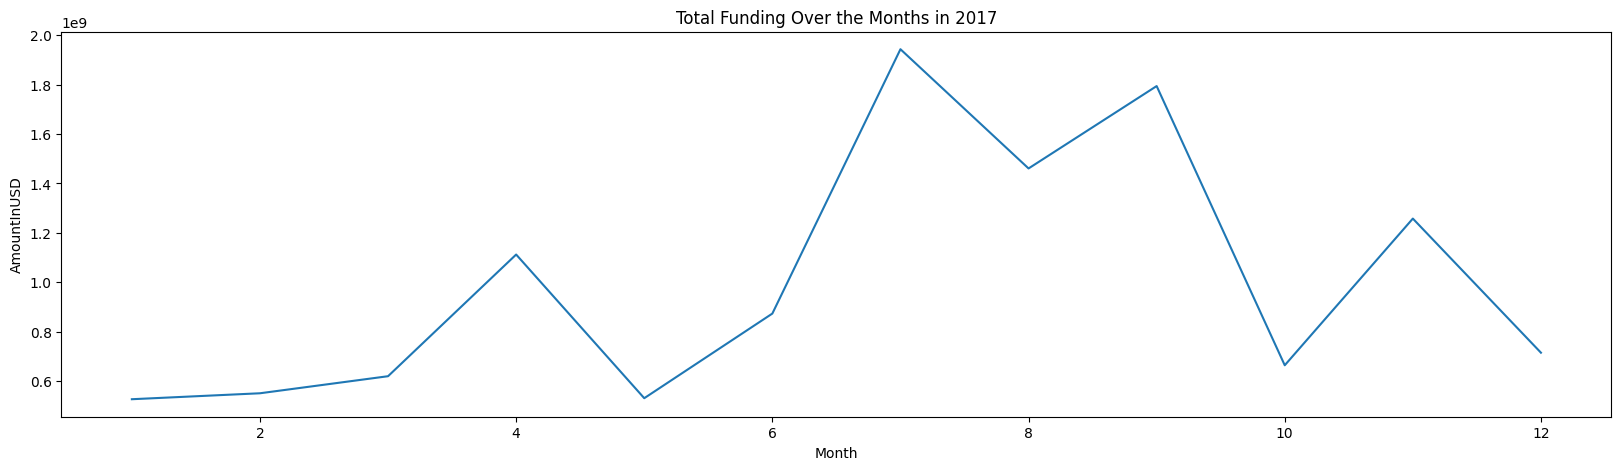

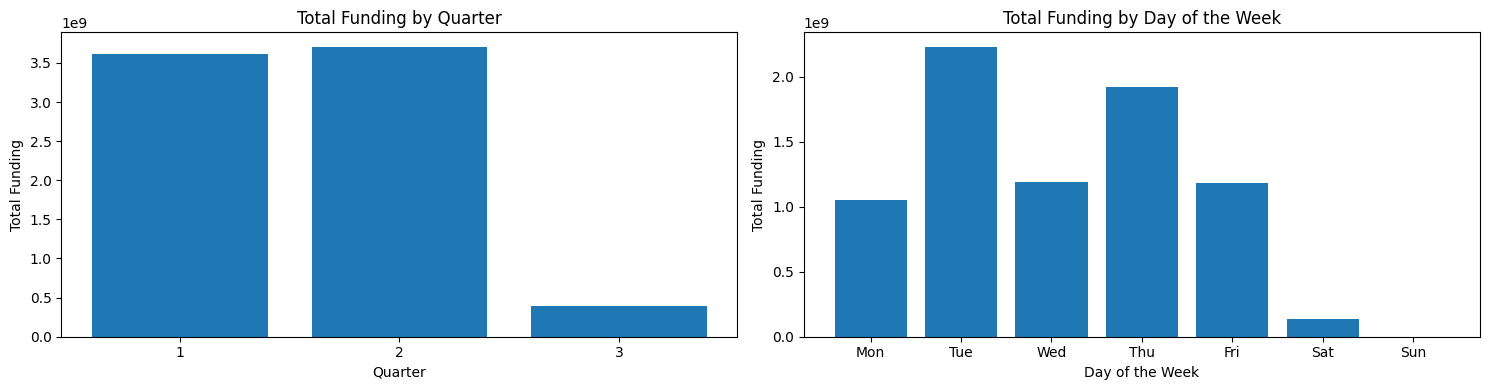

In [84]:
dnewdf_2017 = dnewdf[dnewdf['Year'] == 2017]
a = dnewdf_2015.groupby('Month')['AmountInUSD'].sum()
plt.figure(figsize=(20,5))
plt.plot(a.index,a.values)
plt.xlabel('Month')
plt.ylabel('AmountInUSD')
plt.title('Total Funding Over the Months in 2017')
plt.show()




quarterly_funding = dnewdf[dnewdf['Year'] == 2017].groupby('Quarter')['AmountInUSD'].sum()

business_days = dnewdf[dnewdf['Year'] == 2017].groupby('DayOfWeek')['AmountInUSD'].sum()

# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Plotting total funding by quarter on the first subplot
ax1.bar(quarterly_funding.index, quarterly_funding.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Funding')
ax1.set_title('Total Funding by Quarter')
ax1.set_xticks(quarterly_funding.index)

# Plotting total funding by day of the week on the second subplot
ax2.bar(business_days.index, business_days.values)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Total Funding')
ax2.set_title('Total Funding by Day of the Week')
ax2.set_xticks(business_days.index)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

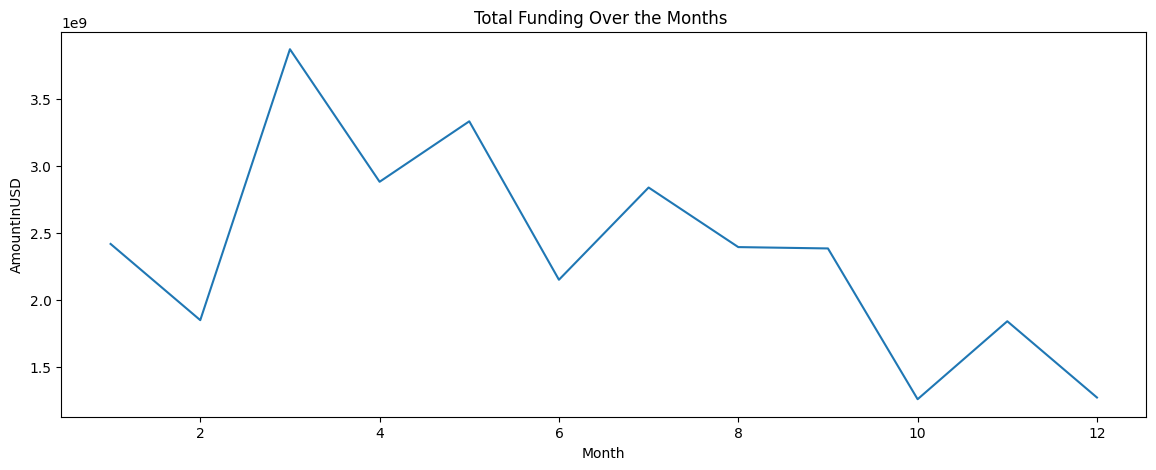

In [55]:

a = dnewdf.groupby('Month')['AmountInUSD'].sum()
plt.figure(figsize=(14,5))
plt.plot(a.index,a.values)
plt.xlabel('Month')
plt.ylabel('AmountInUSD')
plt.title('Total Funding Over the Months ')
plt.show()

# *Conclusion*


* Funding startups are highly dispersed as investors are highly specific about choosing startups

*   There are approximately  2000 unique new startups funded in the year between 2015-2017

*   Paytm, Flipkart  and Ola were funded most

*   Top 10 investments are made through private equity

*   Ola was Funded most frequent number of times.


*   Funding does not depend on number of investors

*   Highest amount  of funding were received from private equity as investment type

*   Highest number  of funding were received from seed funding as investment type
*   Consumer internet was the top most choice for all investors followed by e-commerce


*   Crowd funding and dept funding were less preferred by the investors



*   Banglore has received most amount of funding


*   Banglore had the most average funding

*   Banglore has most amount of start ups followed by Mumbai and New Delhi


*   Amehdabad is the market place for debt funding
*   Number of unique start ups increased by 100% from 2015 to 2016 and decreased  by 10% by 2017


*   Maximum Total funding was generated in the year 2015 and then it slowly decreased with increase in years


*   In 2015 the period of june-oct was funded most and quarter 3 was funded most

*   In 2016 period of june and september were most funded and quterly funding decreased with increase in time


*   In 2017 the period between march- may had recieved most fundings
*   3rd quarter of 2015 was invested most and funding amount was normally distributed


*   Starting months of 2015,mid of 2016 and 3rd Quarter of 2017 were funded most as per individual investment






















